## Import Packages

In [30]:
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import librosa
import librosa.display
import IPython.display as ipd

## Load audio clip

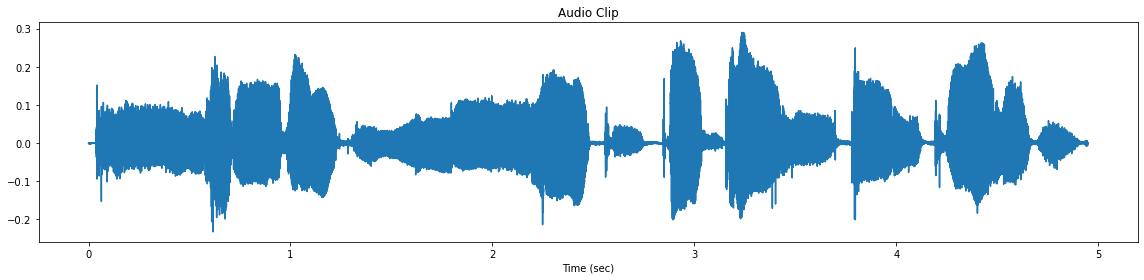

In [31]:
x, sr = librosa.load('../audio/suzanne.wav')
# librosa.display.waveplot(x, sr)

t = np.arange(0, len(x))
t = t / sr

# plot and display
plt.figure(figsize=(16, 4))
plt.plot(t, x)
plt.title('Audio Clip')
plt.xlabel('Time (sec)')
plt.tight_layout()

ipd.Audio(x, rate=sr) 

## YIN Algorithm with librosa.pyin
- reference: https://librosa.org/doc/main/generated/librosa.pyin.html

In [32]:
f0, voiced_flag, voiced_probs = librosa.pyin(x,
                                             fmin=librosa.note_to_hz('C2'),
                                             fmax=librosa.note_to_hz('C7'))
times = librosa.times_like(f0)
print(times.shape) # this will print the number pYIN predictions. Here, the number of audio samples between adjacent pYIN predictions is 512

(214,)


/Users/eunjin/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/eunjin/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/eunjin/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


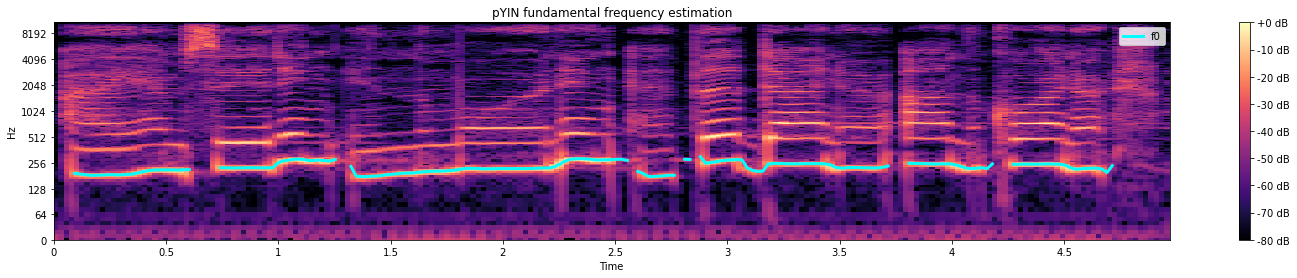

In [33]:
import matplotlib.pyplot as plt
D = librosa.amplitude_to_db(np.abs(librosa.stft(x)), ref=np.max)
fig, ax = plt.subplots(figsize=(25, 4))
img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)
ax.set(title='pYIN fundamental frequency estimation')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

## F0 reconstruction using basic sine oscillator

In [26]:
def basic_sine_oscillator(f0, note_dur, fs):
    ##############################################
    ### WRITE THE FUNCTION
    ### Tip: use np.linspace, np.sin, and np.pi
    t = #FILL THIS BLANK
    x_note = #FILL THIS BLANK
    ##############################################
    return x_note

x = []
hop_note_dur = #FILL THIS BLANK

f0 = np.nan_to_num(f0)
for f in f0:    
    # generate note
    x_note = basic_sine_oscillator(f, hop_note_dur, fs)
    
    # concatenate notes
    x = np.append(x, x_note)
    
ipd.Audio(x, rate=sr)

SyntaxError: invalid syntax (<ipython-input-26-cf3a8bcc2ab4>, line 5)

## Time-scale modification with PyTSMod
- https://github.com/KAIST-MACLab/PyTSMod

In [35]:
import pytsmod as tsm

## Resampling

In [36]:
x, sr = librosa.load("../audio/suzanne.wav") 

sr2 = 1.5*sr

y_re = librosa.resample(x, sr, sr2)

ipd.Audio(y_re, rate=sr) # Discussion: WHY the pitch is changed?

## Time-Scale Modification

In [37]:
x, sr = librosa.load("../audio/suzanne.wav") 

alpha = 1.5
y_tsm1 = tsm.wsola(x, alpha)

ipd.Audio(y_tsm1, rate=sr)

## Pitch Shifting

In [38]:
x, sr = librosa.load("../audio/suzanne.wav") 

alpha = 1.1
y_tsm1 = tsm.wsola(x, alpha)

y_ps1 = librosa.resample(y_tsm1, sr, sr/alpha)

ipd.Audio(y_ps1, rate=sr)

## Quiz Answer

In [40]:
# t = np.linspace(0, note_dur, int(note_dur*sr))
# x_note = np.sin(2*np.pi*f0*t)
# hop_note_dur = (len(y) / f0.shape[0]) / fs # frame to sec

def basic_sine_oscillator(f0, note_dur, fs):
    ##############################################
    ### WRITE THE FUNCTION
    ### Tip: use np.linspace, np.sin, and np.pi
    t = np.linspace(0, note_dur, int(note_dur*sr))
    x_note = np.sin(2*np.pi*f0*t)
    ##############################################
    return x_note

reconstructed_x = []
hop_note_dur = (len(x) / f0.shape[0]) / sr # frame to sec

f0 = np.nan_to_num(f0)
for f in f0:    
    # generate note
    x_note = basic_sine_oscillator(f, hop_note_dur, sr)
    
    # concatenate notes
    reconstructed_x = np.append(reconstructed_x, x_note)
    
ipd.Audio(reconstructed_x, rate=sr)